# Reference Population: low *vs* high Death Probability

The parameters are summarized in the table below (**N = Neutral, S = Selection**):

Parameter  |Low alpha (N/S)|High alpha (N/S)|
-----------|---------|------------|
Final size | $10^6$  |   $10^6$   |
q (start)  |$10^{-3}$| $10^{-3}$  |
q-factor   | $1$   |   $1$    |  
**P(death)**   | $0.1$   |   $0.7$    |
Selection  | 0 / 0.3 |  0 / 0.3   |  

In [1]:
from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

%matplotlib inline
#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# Simulations

## Low alpha (Neutral)

In [2]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-3)
q_fac = 1
alpha = 0.1
sel = 0
low_alpha_N = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
low_alpha_N.simulate()
print("Total population size:", low_alpha_N.size)
print("Generations:", low_alpha_N.gen)
print()
print("Start clone size:", low_alpha_N.start_clone.size)
print("Number of subclones:", len(low_alpha_N.clones[1:]))

Total population size: 1536279
Generations: 22

Start clone size: 1517773
Number of subclones: 1739


## Low alpha (Selection)

In [3]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-3)
q_fac = 1
alpha = 0.1
sel = 0.3
low_alpha_S = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
low_alpha_S.simulate()
print("Total population size:", low_alpha_S.size)
print("Generations:", low_alpha_S.gen)
print()
print("Start clone size:", low_alpha_S.start_clone.size)
print("Number of subclones:", len(low_alpha_S.clones[1:]))

Total population size: 1536279
Generations: 22

Start clone size: 1471050
Number of subclones: 1685


## High alpha (Neutral)

At high Death rates, the population does not manage to grow beyond one cell, because the number of deaths will be rounded to 1 when death rate = 0.7.

Therefore the population size is set manually at 10 cells as well as the size of the start clone.

In [4]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-3)
q_fac = 1
alpha = 0.7
sel = 0
high_alpha_N = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
high_alpha_N.size = 10
high_alpha_N.size_vec = [high_alpha_N.size]
high_alpha_N.start_clone.size = 10
high_alpha_N.start_clone.size_vec = [high_alpha_N.start_clone.size]
high_alpha_N.simulate()
print("Total population size:", high_alpha_N.size)
print("Generations:", high_alpha_N.gen)
print()
print("Start clone size:", high_alpha_N.start_clone.size)
print("Number of subclones:", len(high_alpha_N.clones[1:]))

Total population size: 1049091
Generations: 44

Start clone size: 1005975
Number of subclones: 3538


## High alpha (Selection)
Same comment as for Neutral population

In [5]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-3)
q_fac = 1
alpha = 0.7
sel = 0.3
high_alpha_S = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
high_alpha_S.size = 10
high_alpha_S.size_vec = [high_alpha_S.size]
high_alpha_S.start_clone.size = 10
high_alpha_S.start_clone.size_vec = [high_alpha_S.start_clone.size]
high_alpha_S.simulate()
print("Total population size:", high_alpha_S.size)
print("Generations:", high_alpha_S.gen)
print()
print("Start clone size:", high_alpha_S.start_clone.size)
print("Number of subclones:", len(high_alpha_S.clones[1:]))

Total population size: 1049091
Generations: 44

Start clone size: 1
Number of subclones: 3526


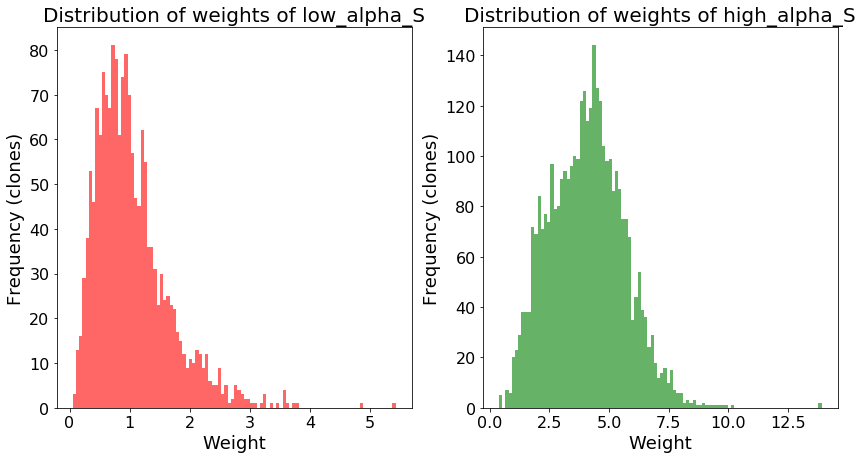

In [6]:
# Check weights of clones for population with selection
low_alpha_weights = []
for clone in low_alpha_S.clones:
    low_alpha_weights.append(clone.weight)

high_alpha_weights = []
for clone in high_alpha_S.clones:
    high_alpha_weights.append(clone.weight)

plt.figure();

plt.subplot(121);
plt.hist(low_alpha_weights, bins=100, color='r', alpha=0.6);
plt.title("Distribution of weights of low_alpha_S");
plt.xlabel("Weight");
plt.ylabel("Frequency (clones)");

plt.subplot(122);
plt.hist(high_alpha_weights, bins=100, color='g', alpha=0.6);
plt.title("Distribution of weights of high_alpha_S");
plt.xlabel("Weight");
plt.ylabel("Frequency (clones)");

plt.show()

**ALL ANALYSES** are carried out with the detection limit defined below, unless otherwise stated.

In [7]:
detection_limit = 100

## Evolution of clone family sizes for low_alpha_N and low_alpha_S



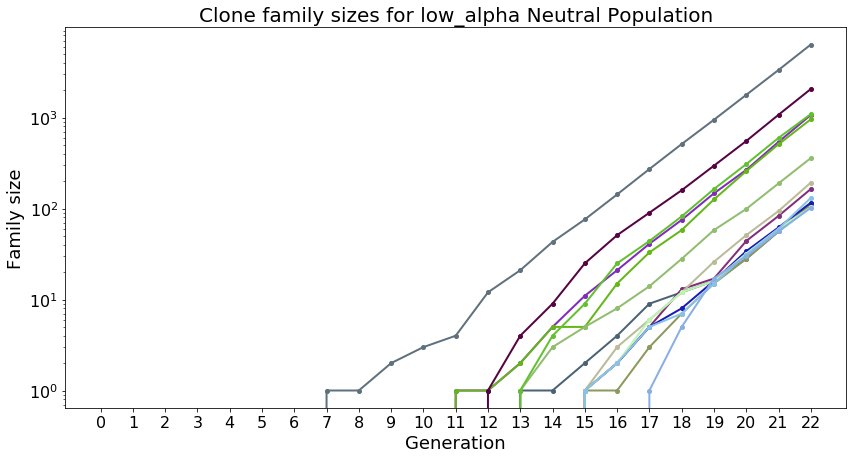

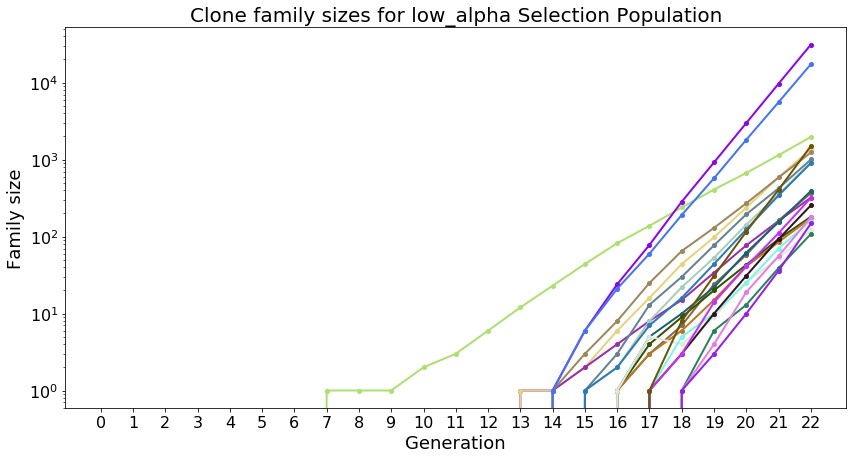

In [8]:
low_alpha_N_fam_size_plot = family_size_plots(low_alpha_N, det_lim=detection_limit);
plt.title("Clone family sizes for low_alpha Neutral Population");
plt.yscale('log');
plt.savefig("./Figures/Ref-Death_prob/low_alpha_N-fam_size_evo.png");
plt.show()

low_alpha_S_fam_size_plot = family_size_plots(low_alpha_S, det_lim=detection_limit);
plt.title("Clone family sizes for low_alpha Selection Population");
plt.yscale('log');
plt.savefig("./Figures/Ref-Death_prob/low_alpha_S-fam_size_evo.png");
plt.show()

## Evolution of clone family sizes for high_alpha_N and high_alpha_S



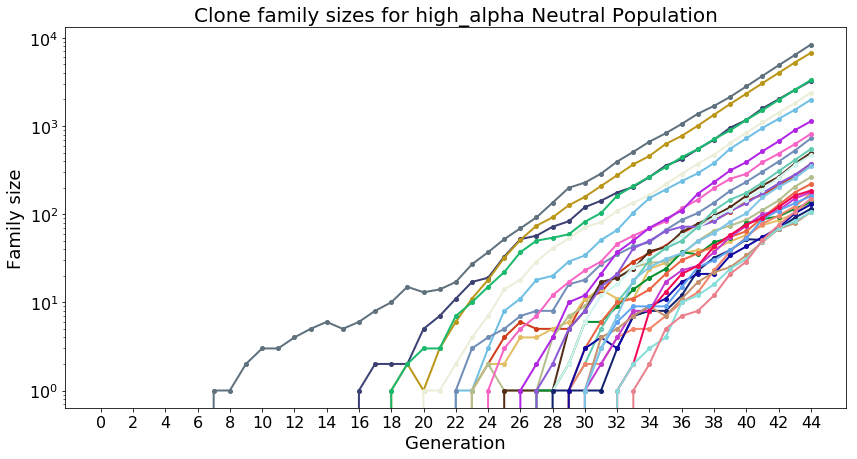

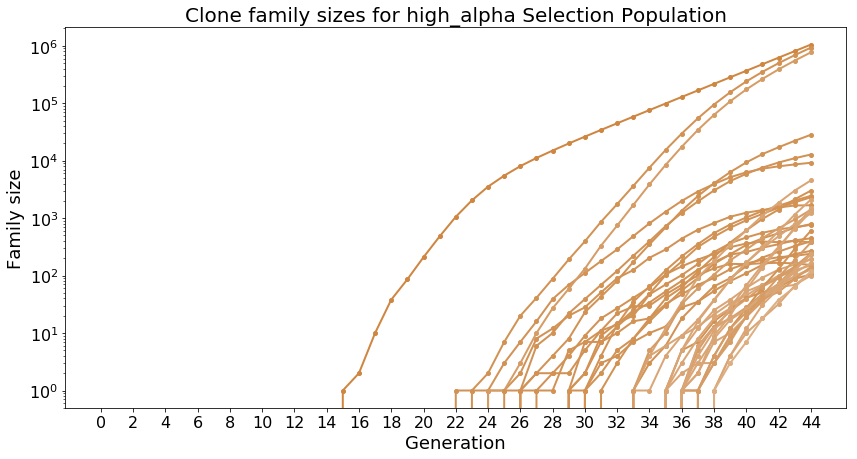

In [9]:
high_alpha_N_fam_size_plot = family_size_plots(high_alpha_N, det_lim=detection_limit);
plt.title("Clone family sizes for high_alpha Neutral Population");
plt.yscale('log');
plt.xticks(range(0, high_alpha_N.gen+1, 2));
plt.savefig("./Figures/Ref-Death_prob/high_alpha_N-fam_size_evo.png");
plt.show()

high_alpha_S_fam_size_plot = family_size_plots(high_alpha_S, det_lim=detection_limit);
plt.title("Clone family sizes for high_alpha Selection Population");
plt.yscale('log');
plt.xticks(range(0, high_alpha_S.gen+1, 2));
plt.savefig("./Figures/Ref-Death_prob/high_alpha_S-fam_size_evo.png");
plt.show()

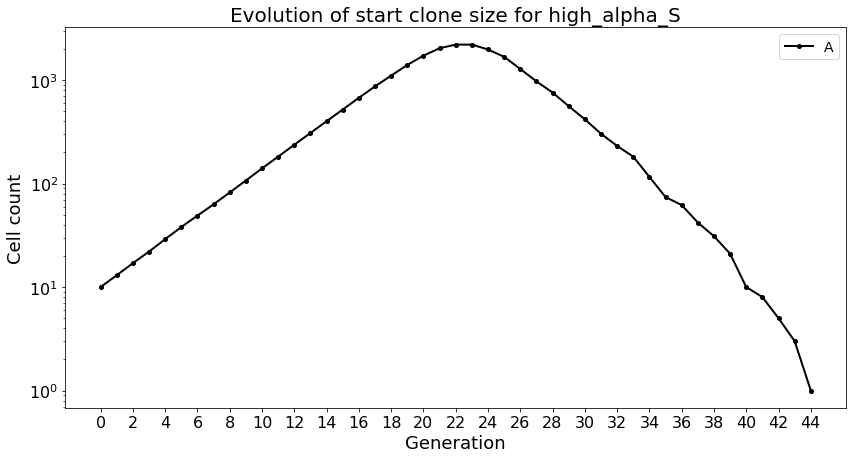

In [10]:
# evolution of start clone size for high_alpha_S
plt.figure()
plt.plot(high_alpha_S.start_clone.size_vec, marker='.', color='k', label=high_alpha_S.start_clone.ID);
plt.ylabel("Cell count");
plt.xlabel("Generation");
plt.title("Evolution of start clone size for high_alpha_S");
plt.legend();
plt.xticks(range(0, high_alpha_S.gen+1, 2));
plt.yscale('log');
plt.show()

## Phylo tree for low_alpha Populations



### Neutral

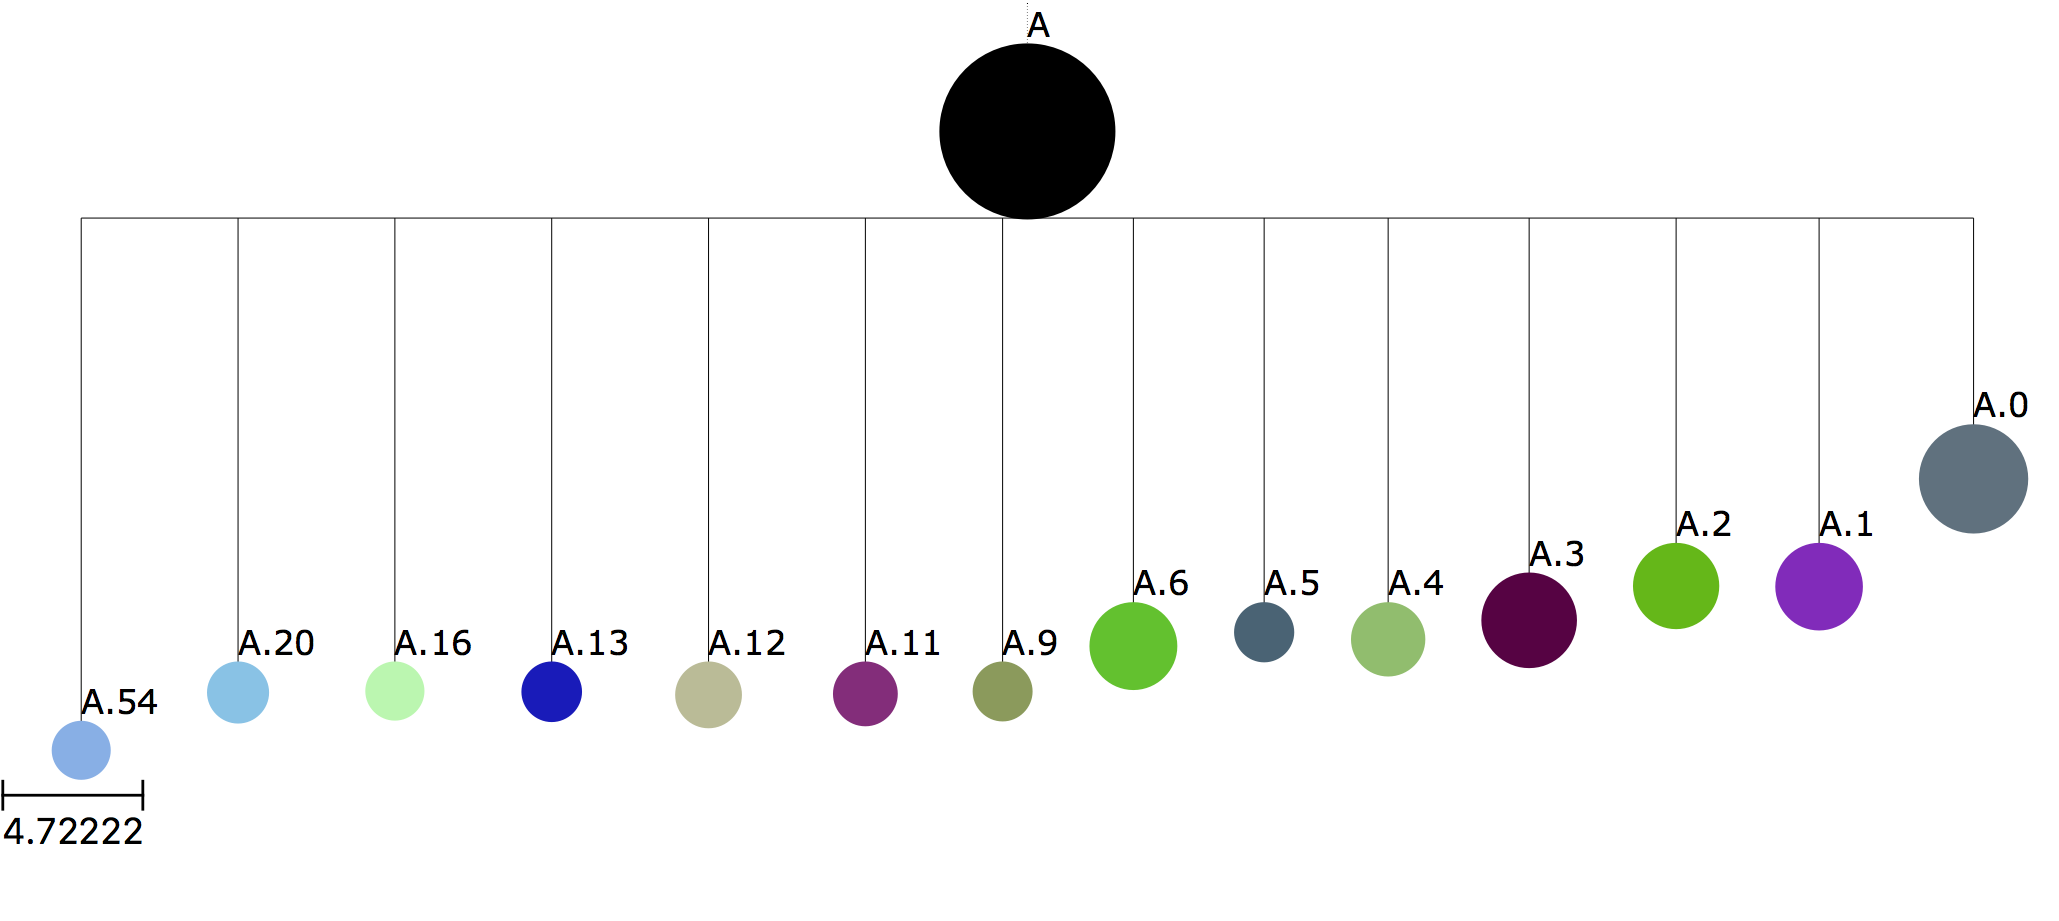

In [11]:
low_alpha_N_tree, low_alpha_N_ts = build_tree(low_alpha_N, det_lim=detection_limit, log=True);
#print(low_alpha_N_tree)
low_alpha_N_tree.render("./Figures/Ref-Death_prob/low_alpha_N-tree.png", tree_style=low_alpha_N_ts, h=260, units='mm');
Image("./Figures/Ref-Death_prob/low_alpha_N-tree.png")

### Selection

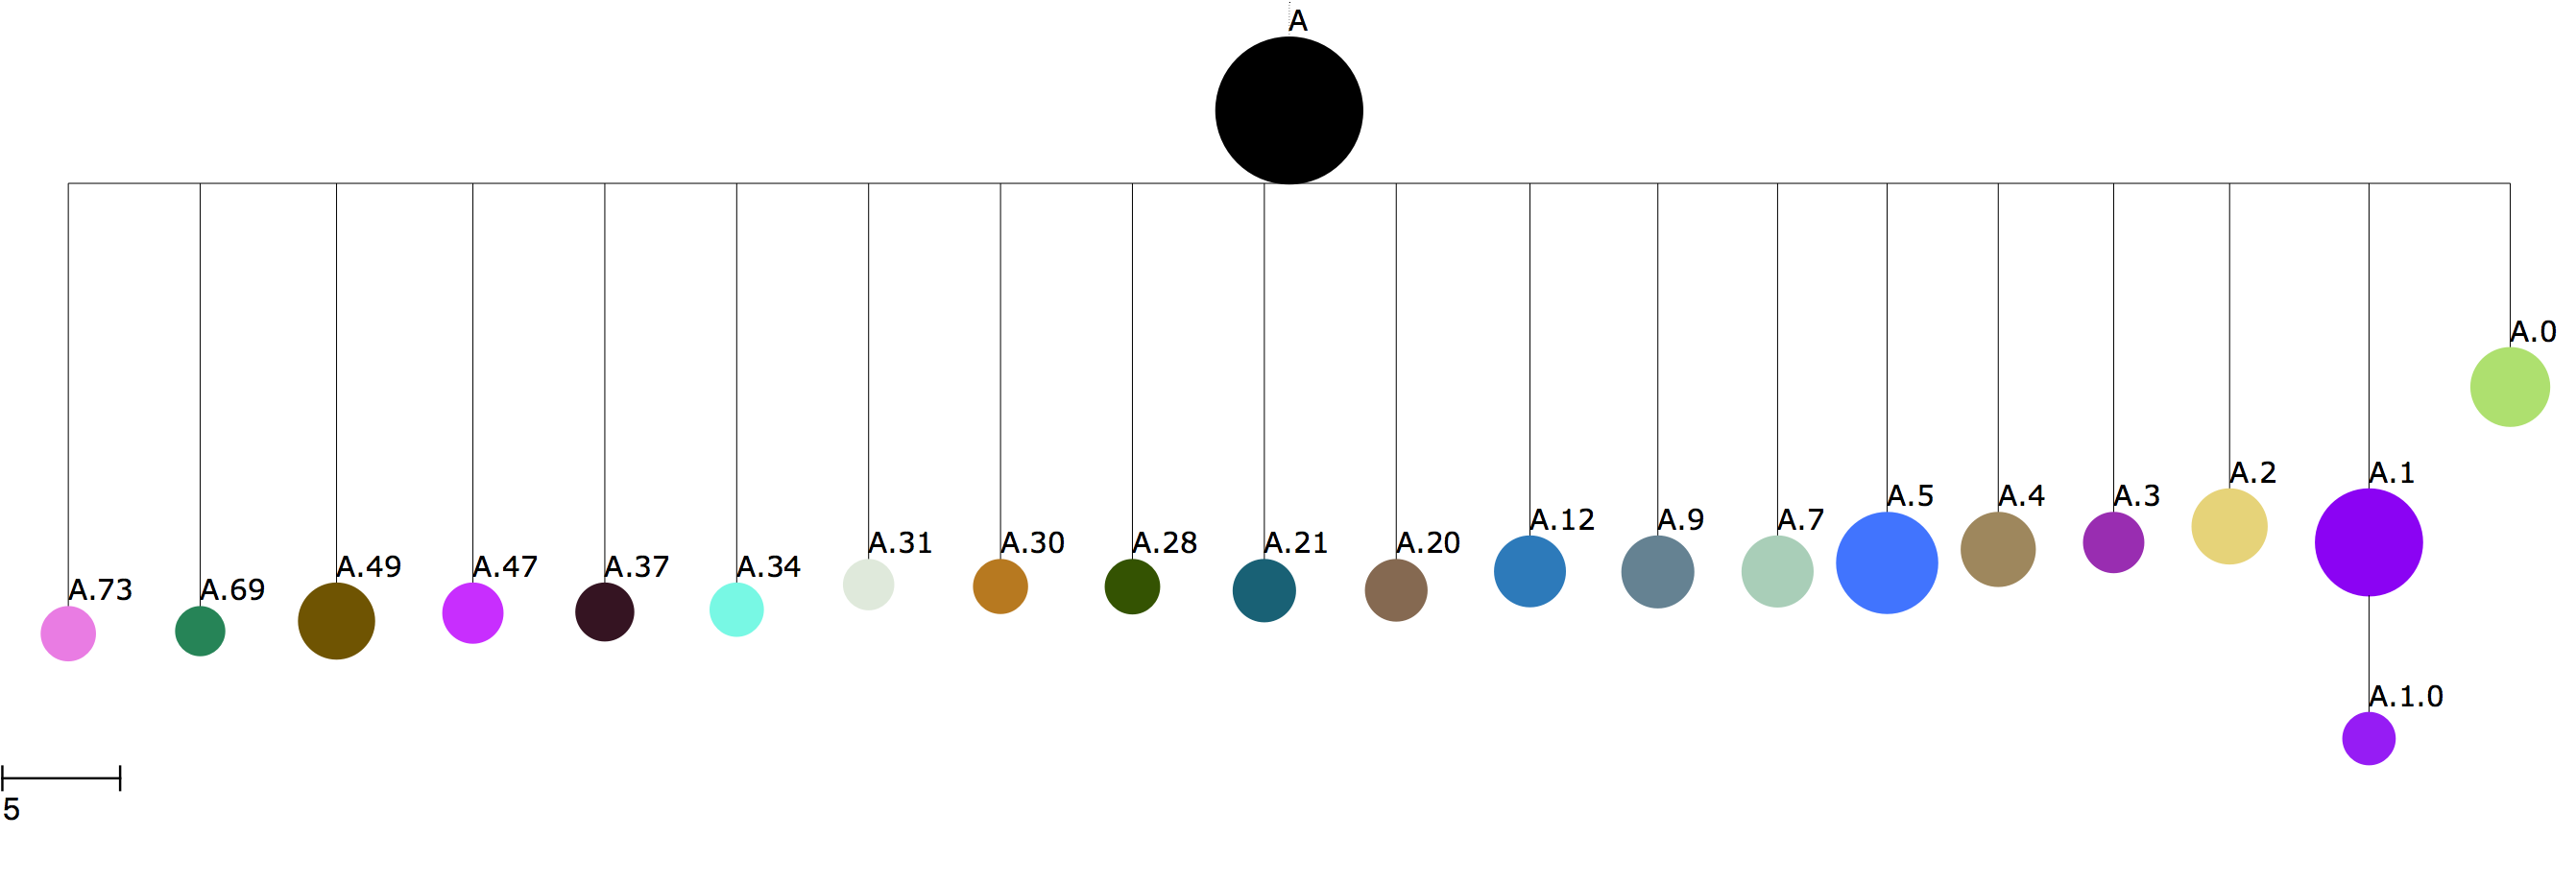

In [12]:
low_alpha_S_tree, low_alpha_S_ts = build_tree(low_alpha_S, det_lim=detection_limit, log=True);
#print(low_alpha_S_tree)
low_alpha_S_tree.render("./Figures/Ref-Death_prob/low_alpha_S-tree.png", tree_style=low_alpha_S_ts, h=260, units='mm');
Image("./Figures/Ref-Death_prob/low_alpha_S-tree.png")

## Phylo tree for high_alpha populations

### Neutral

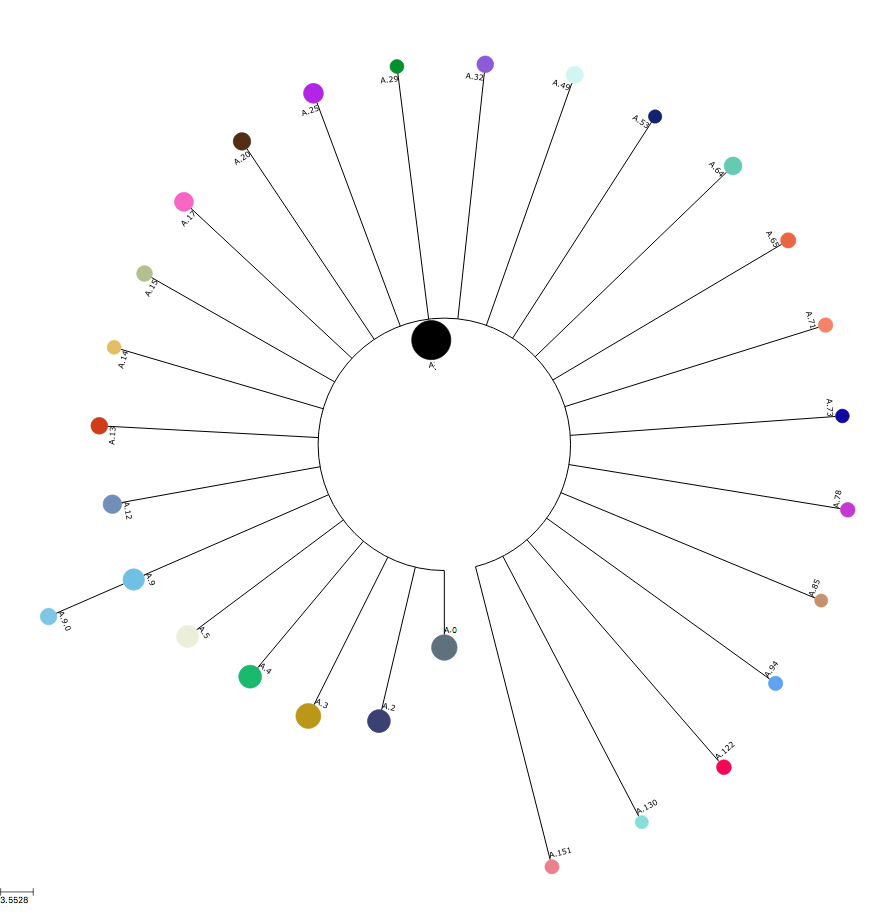

In [13]:
high_alpha_N_tree, high_alpha_N_ts = build_tree(high_alpha_N, det_lim=detection_limit, log=True);
#print(high_alpha_N_tree)
high_alpha_N_ts.mode = "c"
high_alpha_N_tree.render("./Figures/Ref-Death_prob/high_alpha_N-tree.png", tree_style=high_alpha_N_ts, h=260, units='mm');
Image("./Figures/Ref-Death_prob/high_alpha_N-tree.png")

### Selection

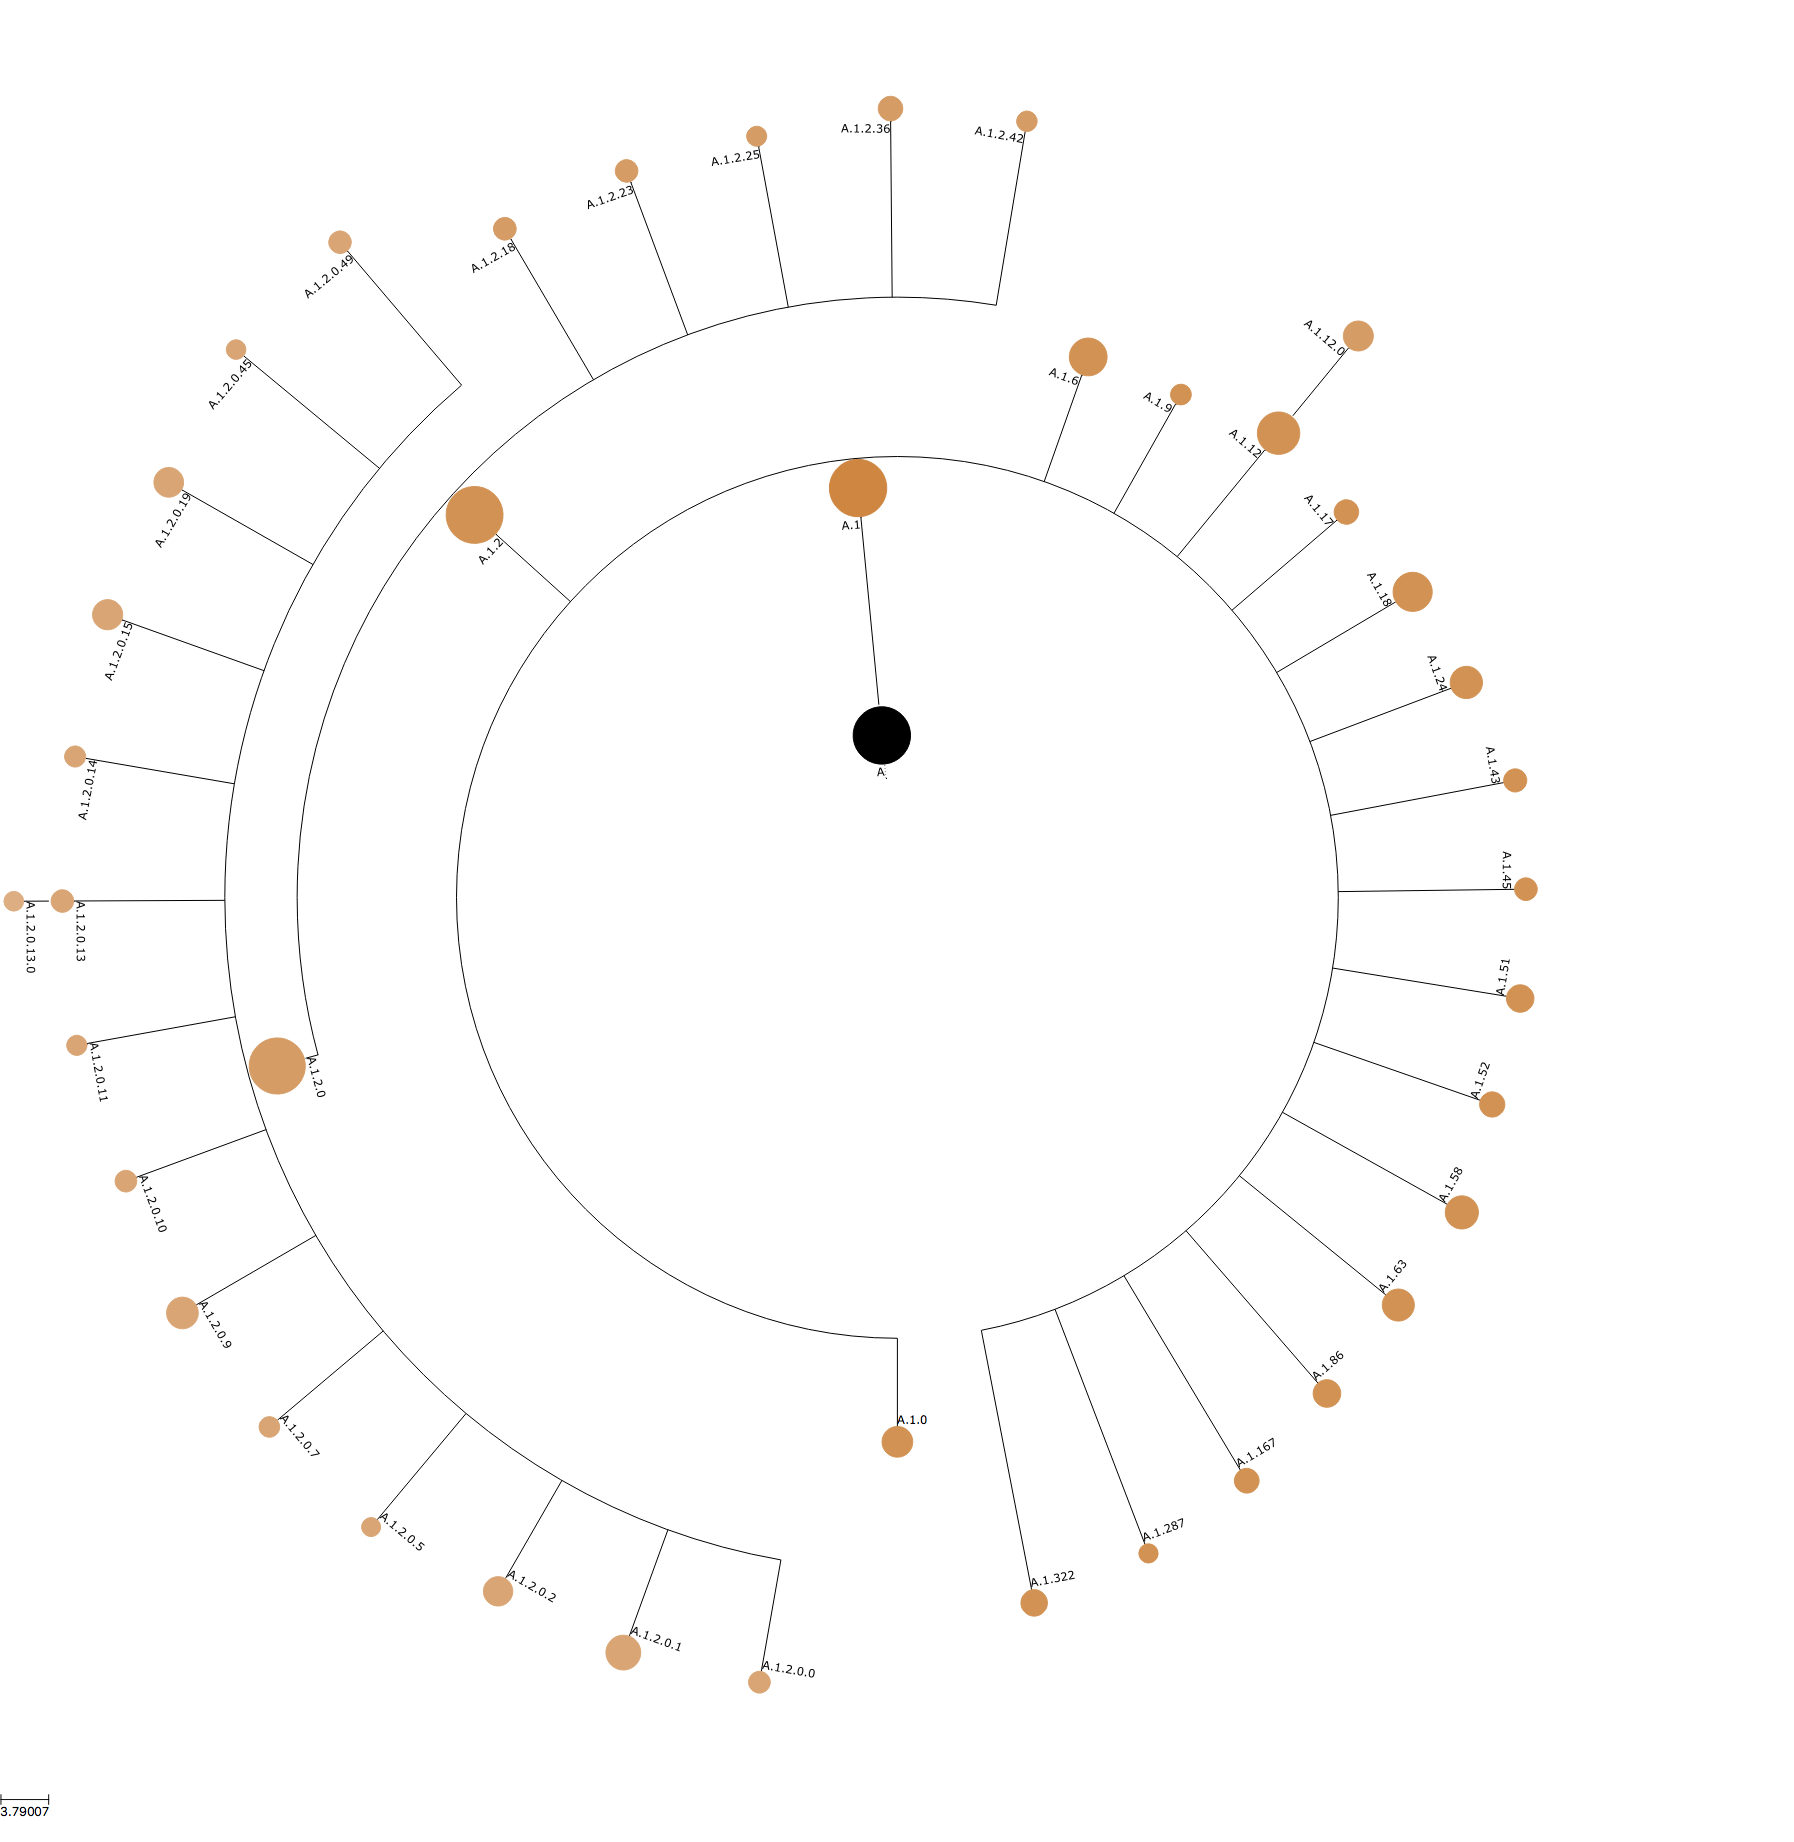

In [14]:
high_alpha_S_tree, high_alpha_S_ts = build_tree(high_alpha_S, det_lim=detection_limit, log=True);
#print(high_alpha_S_tree)
high_alpha_S_ts.mode = "c"
high_alpha_S_tree.render("./Figures/Ref-Death_prob/high_alpha_S-tree.png", tree_style=high_alpha_S_ts, h=520, units='mm');
Image("./Figures/Ref-Death_prob/high_alpha_S-tree.png")

## Allele frequency spectrum for low_alpha Populations

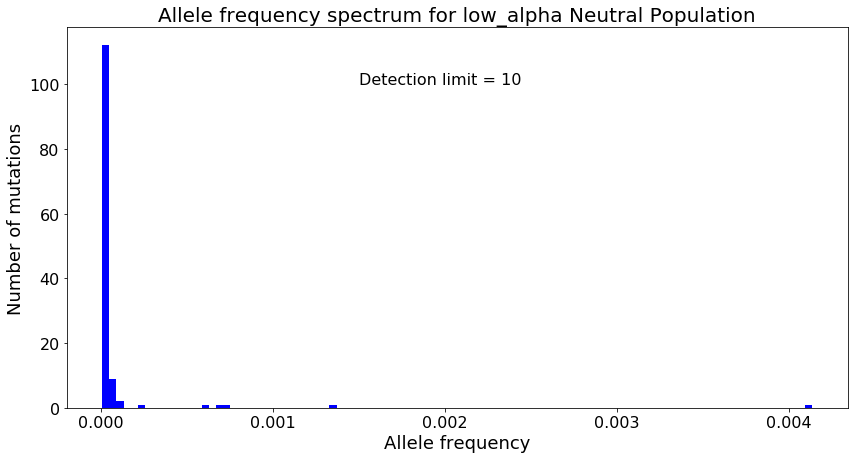

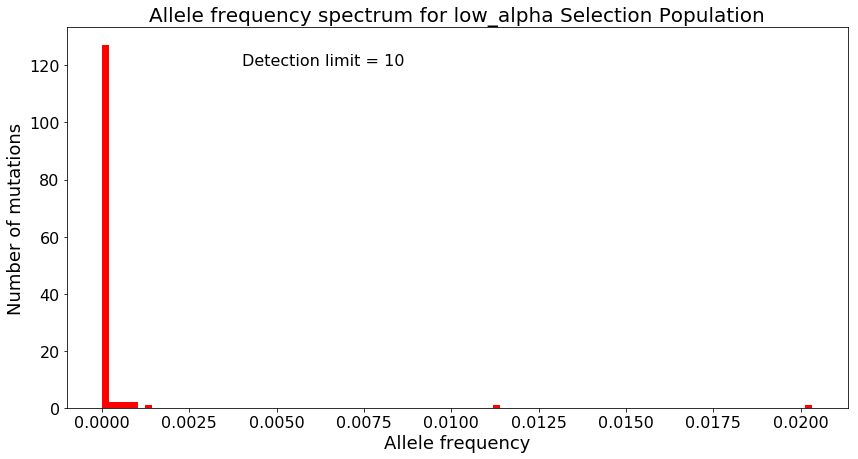

In [15]:
lim = 10

low_alpha_N_af = allele_freq_spectrum(low_alpha_N, det_lim=lim)
low_alpha_N_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='b');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for low_alpha Neutral Population');
plt.text(0.0015, 100, "Detection limit = %s" %(lim));
plt.savefig("./Figures/Ref-Death_prob/low_alpha_N-AF_spec.png");
plt.show()

low_alpha_S_af = allele_freq_spectrum(low_alpha_S, det_lim=lim)
low_alpha_S_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='r');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for low_alpha Selection Population');
plt.text(0.004, 120, "Detection limit = %s" %(lim));
plt.savefig("./Figures/Ref-Death_prob/low_alpha_S-AF_spec.png");
plt.show()

## Allele frequency spectrum for high_alpha Populations

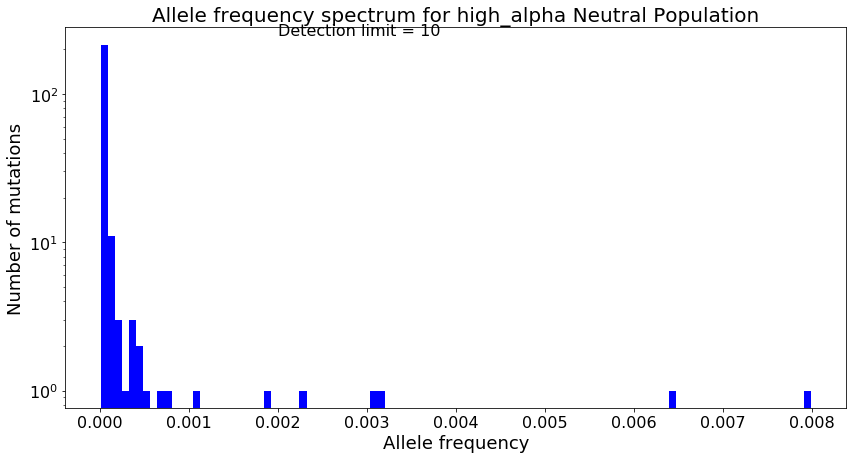

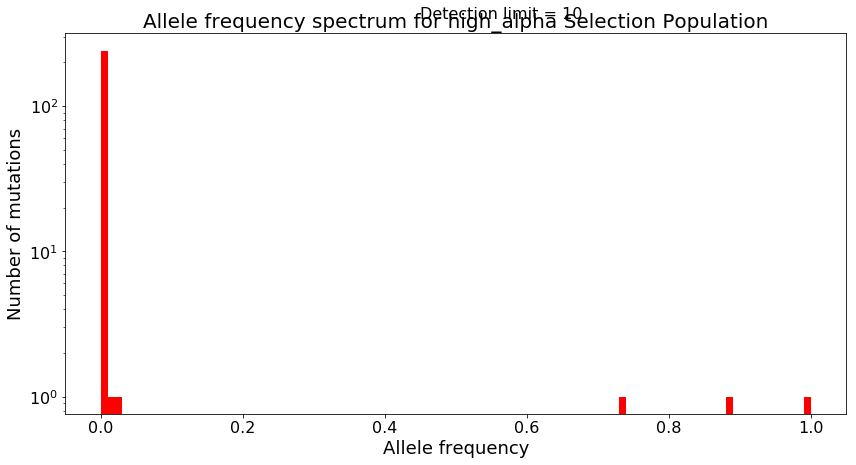

In [16]:
lim = 10

high_alpha_N_af = allele_freq_spectrum(high_alpha_N, det_lim=lim)
high_alpha_N_af.iloc[1:].plot(kind='hist', grid=False, logy=True, bins=100, color='b');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for high_alpha Neutral Population');
plt.text(0.002, 250, "Detection limit = %s" %(lim));
plt.savefig("./Figures/Ref-Death_prob/high_alpha_N-AF_spec.png")
plt.show()

high_alpha_S_af = allele_freq_spectrum(high_alpha_S, det_lim=lim)
high_alpha_S_af.iloc[1:].plot(kind='hist', grid=False, logy=True, bins=100, color='r');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for high_alpha Selection Population');
plt.text(0.45, 400, "Detection limit = %s" %(lim));
plt.savefig("./Figures/Ref-Death_prob/high_alpha_S-AF_spec.png");
plt.show()

## Cumulative number of mutations in function of 1/f

### Low alpha populations


R^2 = 0.996939472817


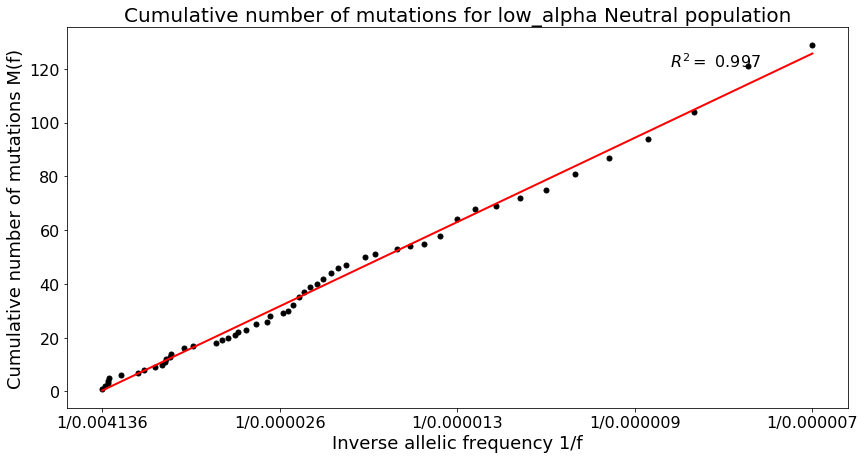


R^2 = 0.995076141842


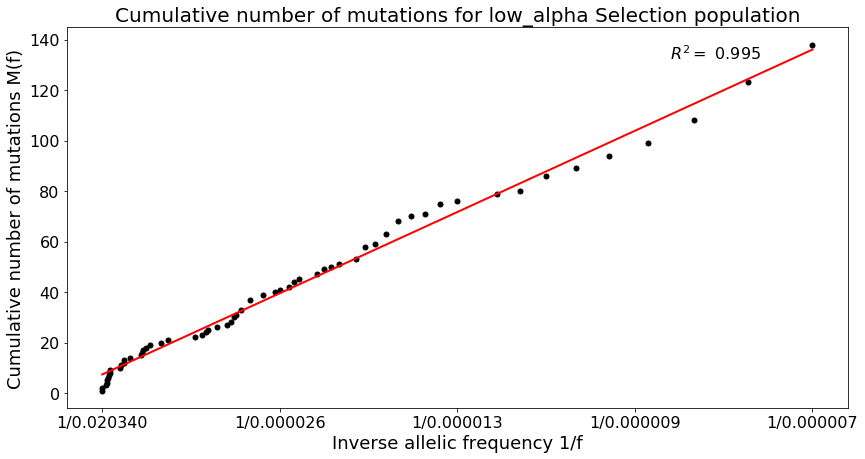

In [17]:
fit_low_alpha_N_af_raw, fit_low_alpha_N_af_r_value, fit_low_alpha_N_fig = fit_cumulative_mutations(low_alpha_N_af)
print("\nR^2 =", fit_low_alpha_N_af_r_value)
plt.title("Cumulative number of mutations for low_alpha Neutral population");
plt.savefig("./Figures/Ref-Death_prob/Low_alpha_N-Cum_num_M.png");
plt.show()

fit_low_alpha_S_af_raw, fit_low_alpha_S_af_r_value, fit_low_alpha_S_fig = fit_cumulative_mutations(low_alpha_S_af)
print("\nR^2 =", fit_low_alpha_S_af_r_value)
plt.title("Cumulative number of mutations for low_alpha Selection population");
plt.savefig("./Figures/Ref-Death_prob/Low_alpha_S-Cum_num_M.png");
plt.show()

### High alpha populations


R^2 = 0.998845058175


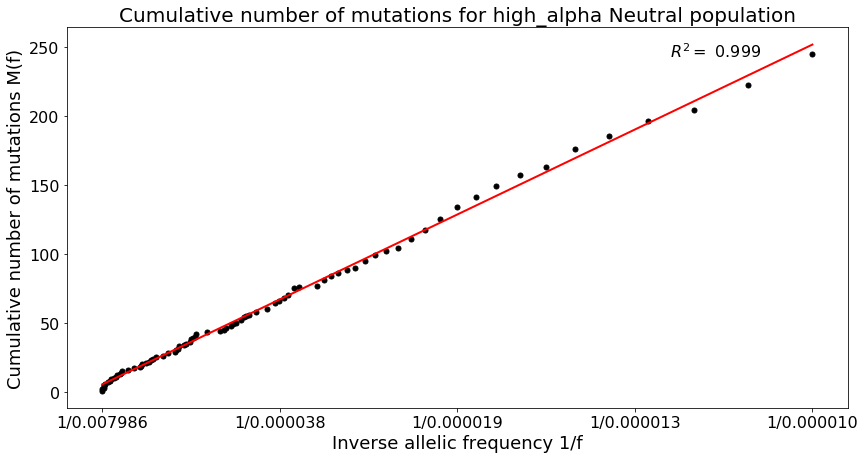


R^2 = 0.996298573646


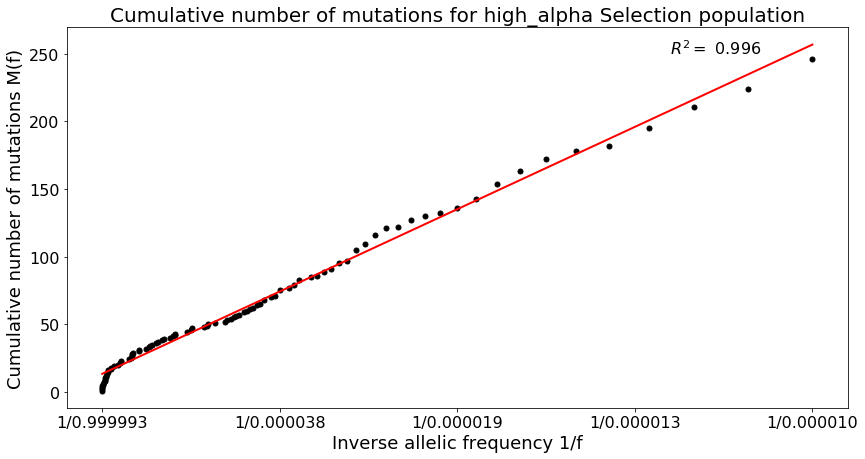

In [18]:
fit_high_alpha_N_af_raw, fit_high_alpha_N_af_r_value, fit_high_alpha_N_fig = fit_cumulative_mutations(high_alpha_N_af)
print("\nR^2 =", fit_high_alpha_N_af_r_value)
plt.title("Cumulative number of mutations for high_alpha Neutral population");
plt.savefig("./Figures/Ref-Death_prob/High_alpha_N-Cum_num_M.png");
plt.show()

fit_high_alpha_S_af_raw, fit_high_alpha_S_af_r_value, fit_high_alpha_S_fig = fit_cumulative_mutations(high_alpha_S_af)
print("\nR^2 =", fit_high_alpha_S_af_r_value)
plt.title("Cumulative number of mutations for high_alpha Selection population");
plt.savefig("./Figures/Ref-Death_prob/High_alpha_S-Cum_num_M.png");
plt.show()

## Distribution of number of mutations for low_alpha Populations

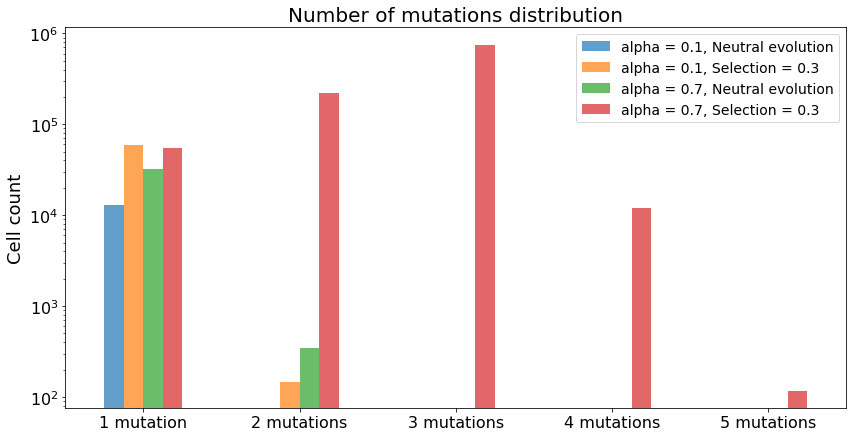

In [19]:
low_alpha_N_num_mut_df = num_mutations_distribution(low_alpha_N, det_lim=detection_limit)
low_alpha_N_num_mut_df.columns = ["alpha = 0.1, Neutral evolution"]
#low_alpha_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

low_alpha_S_num_mut_df = num_mutations_distribution(low_alpha_S, det_lim=detection_limit)
low_alpha_S_num_mut_df.columns = ["alpha = 0.1, Selection = %s" %(sel)]
#low_alpha_Snum_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='r', alpha=0.6);

high_alpha_N_num_mut_df = num_mutations_distribution(high_alpha_N, det_lim=detection_limit)
high_alpha_N_num_mut_df.columns = ["alpha = 0.7, Neutral evolution"]
#low_alpha_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

high_alpha_S_num_mut_df = num_mutations_distribution(high_alpha_S, det_lim=detection_limit)
high_alpha_S_num_mut_df.columns = ["alpha = 0.7, Selection = %s" %(sel)]
#low_alpha_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

combo_low = low_alpha_N_num_mut_df.join(low_alpha_S_num_mut_df, how='right')
combo_high = high_alpha_N_num_mut_df.join(high_alpha_S_num_mut_df, how='right')
combo = combo_low.join(combo_high, how='right')

combo.plot(kind='bar', logy=True, legend=True, rot=0, alpha=0.7);
plt.ylabel("Cell count");
plt.title("Number of mutations distribution");
plt.savefig("./Figures/Ref-Death_prob/alpha-Num_mut.png")

## Reconstructing the mutational timeline

Using a **detection limit** of **10**!!!

In [20]:
low_alpha_N_data = final_data(low_alpha_N)
low_alpha_S_data = final_data(low_alpha_S)
high_alpha_N_data = final_data(high_alpha_N)
high_alpha_S_data = final_data(high_alpha_S)

### Low alpha populations

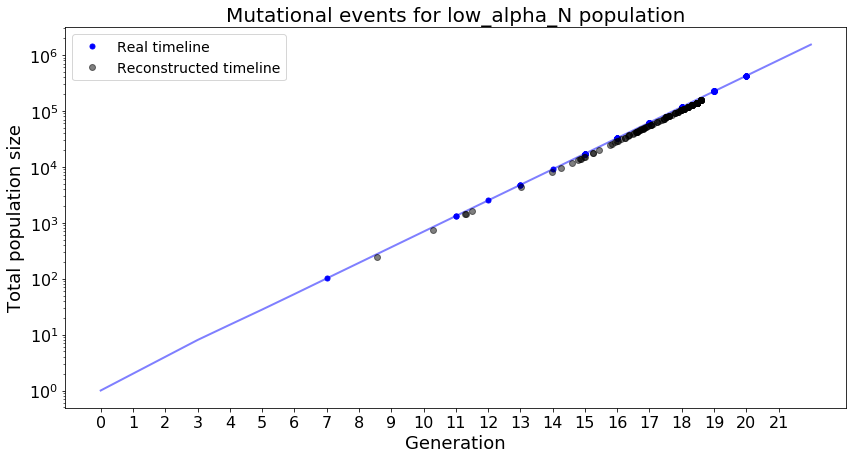

In [27]:
low_alpha_N_mutations = low_alpha_N_data.iloc[1:].loc[low_alpha_N_data['Family size'] >= 10]
low_alpha_N_real_t = low_alpha_N.gen - low_alpha_N_mutations['Age'].values
low_alpha_N_real_popsizes = list(low_alpha_N.size_vec[i] for i in low_alpha_N_real_t)

low_alpha_N_rec_t, low_alpha_N_rec_popsizes = reconstruct_mutational_timeline(low_alpha_N, det_lim = 10)

plt.plot(low_alpha_N.size_vec, color='b', alpha=0.5);
plt.plot(low_alpha_N_real_t, low_alpha_N_real_popsizes, marker='o', markersize=5, color='b', 
         linestyle='none', label='Real timeline');
plt.plot(low_alpha_N_rec_t, low_alpha_N_rec_popsizes, marker='o', markersize=6, color='k', alpha=0.5,
         linestyle='none', label='Reconstructed timeline');
plt.xlabel('Generation');
plt.ylabel('Total population size');
plt.legend();
plt.title('Mutational events for low_alpha_N population');
plt.xticks(range(0, low_alpha_N.gen, 1));
#plt.xlim(0, 21);
plt.yscale('log');
plt.savefig("./Figures/Ref-Death_prob/low_alpha_N-Rec_mut_timeline.png");
plt.show()

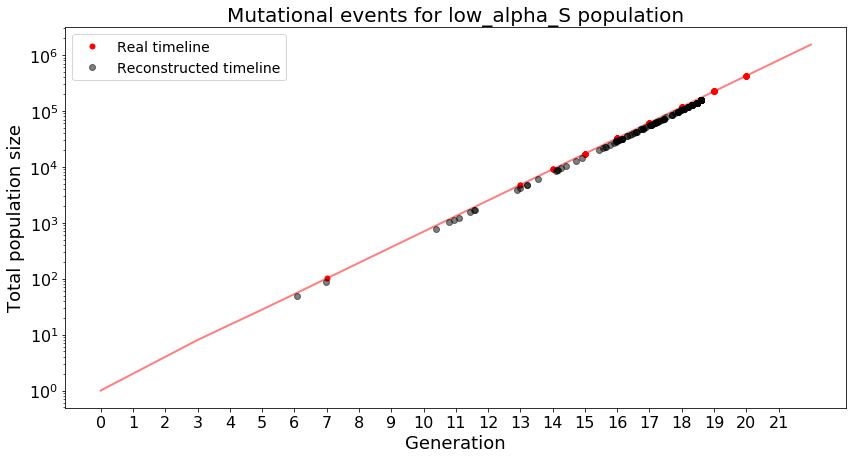

In [22]:
low_alpha_S_mutations = low_alpha_S_data.iloc[1:].loc[low_alpha_S_data['Family size'] >= 10]
low_alpha_S_real_t = low_alpha_S.gen - low_alpha_S_mutations['Age'].values
low_alpha_S_real_popsizes = list(low_alpha_S.size_vec[i] for i in low_alpha_S_real_t)

low_alpha_S_rec_t, low_alpha_S_rec_popsizes = reconstruct_mutational_timeline(low_alpha_S, det_lim = 10)

plt.plot(low_alpha_S.size_vec, color='r', alpha=0.5);
plt.plot(low_alpha_S_real_t, low_alpha_S_real_popsizes, marker='o', markersize=5, color='r', 
         linestyle='none', label='Real timeline');
plt.plot(low_alpha_S_rec_t, low_alpha_S_rec_popsizes, marker='o', markersize=6, color='k', alpha=0.5,
         linestyle='none', label='Reconstructed timeline');
plt.xlabel('Generation');
plt.ylabel('Total population size');
plt.legend();
plt.title('Mutational events for low_alpha_S population');
plt.xticks(range(0, low_alpha_S.gen, 1));
#plt.xlim(0, 21);
plt.yscale('log');
plt.savefig("./Figures/Ref-Death_prob/low_alpha_S-Rec_mut_timeline.png");
plt.show()

### High alpha populations

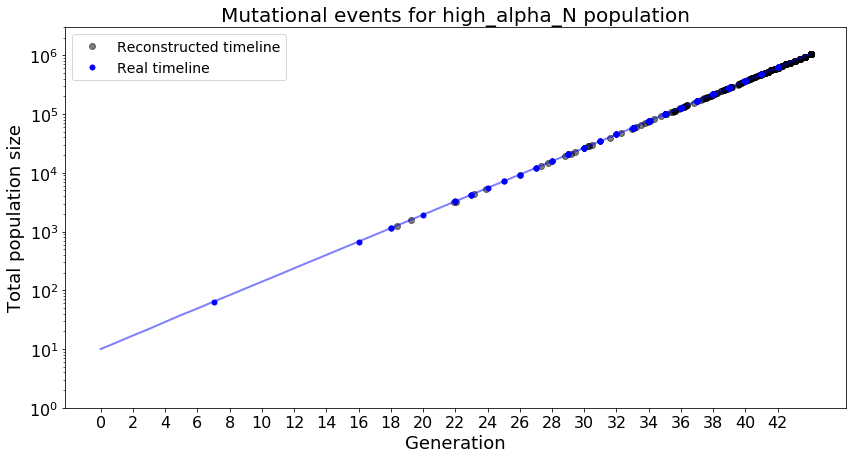

In [36]:
high_alpha_N_mutations = high_alpha_N_data.iloc[1:].loc[high_alpha_N_data['Family size'] >= 10]
high_alpha_N_real_t = high_alpha_N.gen - high_alpha_N_mutations['Age'].values
high_alpha_N_real_popsizes = list(high_alpha_N.size_vec[i] for i in high_alpha_N_real_t)

high_alpha_N_rec_t, high_alpha_N_rec_popsizes = reconstruct_mutational_timeline(high_alpha_N, det_lim = 10)

# correcting for the different starting size used for this population (= 10)
high_alpha_N_rec_popsizes = high_alpha_N_rec_popsizes*10

plt.plot(high_alpha_N_rec_t, high_alpha_N_rec_popsizes, marker='o', markersize=6, color='k', alpha=0.5,
         linestyle='none', label='Reconstructed timeline');
plt.plot(high_alpha_N.size_vec, color='b', alpha=0.5);
plt.plot(high_alpha_N_real_t, high_alpha_N_real_popsizes, marker='o', markersize=5, color='b', 
         linestyle='none', label='Real timeline');
plt.xlabel('Generation');
plt.ylabel('Total population size');
plt.legend();
plt.title('Mutational events for high_alpha_N population');
plt.xticks(range(0, high_alpha_N.gen, 2));
#plt.xlim(18, 50);
plt.ylim(1, 3*10**6)
plt.yscale('log');
plt.savefig("./Figures/Ref-Death_prob/high_alpha_N-Rec_mut_timeline.png");
plt.show()

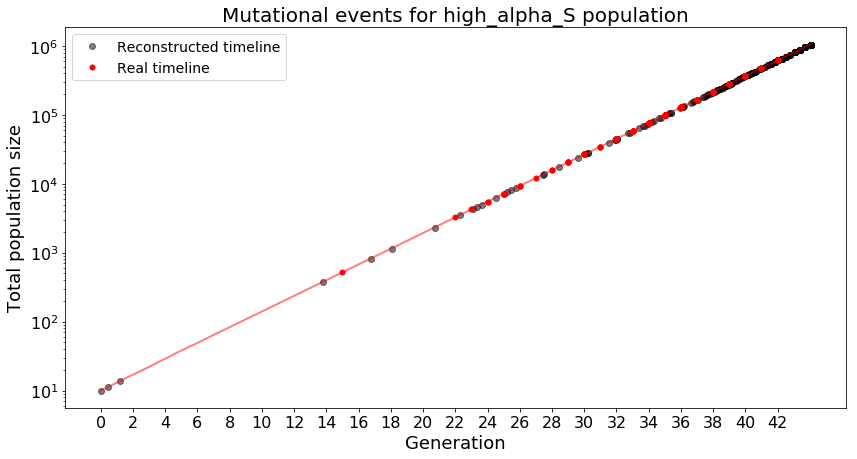

In [37]:
high_alpha_S_mutations = high_alpha_S_data.iloc[1:].loc[high_alpha_S_data['Family size'] >= 10]
high_alpha_S_real_t = high_alpha_S.gen - high_alpha_S_mutations['Age'].values
high_alpha_S_real_popsizes = list(high_alpha_S.size_vec[i] for i in high_alpha_S_real_t)

high_alpha_S_rec_t, high_alpha_S_rec_popsizes = reconstruct_mutational_timeline(high_alpha_S, det_lim = 10)

# correcting for the different starting size used for this population (= 10)
high_alpha_S_rec_popsizes = high_alpha_S_rec_popsizes*10

plt.plot(high_alpha_S_rec_t, high_alpha_S_rec_popsizes, marker='o', markersize=6, color='k', alpha=0.5,
         linestyle='none', label='Reconstructed timeline');
plt.plot(high_alpha_S.size_vec, color='r', alpha=0.5);
plt.plot(high_alpha_S_real_t, high_alpha_S_real_popsizes, marker='o', markersize=5, color='r', 
         linestyle='none', label='Real timeline');
plt.xlabel('Generation');
plt.ylabel('Total population size');
plt.legend();
plt.title('Mutational events for high_alpha_S population');
plt.xticks(range(0, high_alpha_S.gen, 2));
#plt.xlim(0, 50);
plt.yscale('log');
plt.savefig("./Figures/Ref-Death_prob/high_alpha_S-Rec_mut_timeline.png");
plt.show()